<a href="https://colab.research.google.com/github/Lplus0/DeepLearningLink/blob/main/Sklearn_MSE_3042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas_datareader import data
import yfinance as yf
from sklearn.preprocessing import StandardScaler


In [ ]:
yf.pdr_override()
df = data.get_data_yahoo(tickers='0066.HK ',start='2010-01-01', end='2020-06-30')
df = df['Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
X = np.array(df[:-1])  # 使用前一天的价格作为特征
y = np.array(df[1:])   # 使用当天的价格作为目标


In [ ]:
df[:100]

(2586,)

In [ ]:
# 划分训练集和测试集
# 随机划分 4：1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 1D-2D
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2068, 1), (518, 1), (2068,), (518,))

In [ ]:
X_test[:20]

array([[27.79999924],
       [45.20000076],
       [27.79999924],
       [25.25      ],
       [31.04999924],
       [30.85000038],
       [29.04999924],
       [32.20000076],
       [44.70000076],
       [28.54999924],
       [31.60000038],
       [40.40000153],
       [39.09999847],
       [40.34999847],
       [36.84999847],
       [28.54999924],
       [28.70000076],
       [39.79999924],
       [36.        ],
       [27.89999962]])

In [ ]:
# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("test dataset Mean Squared Error:", mse)
# test dataset

test dataset Mean Squared Error: 0.20903913515373482


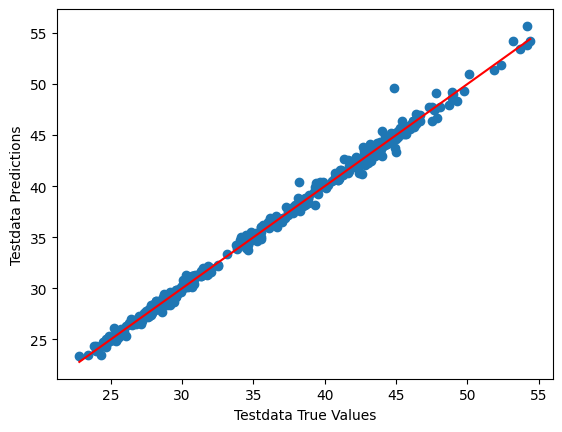

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.xlabel('Testdata True Values')
plt.ylabel('Testdata Predictions')

plt.show()

In [ ]:
yf.pdr_override()
df1 = data.get_data_yahoo(tickers='0066.HK ',start='2021-01-01', end='2021-04-30')
df1 = df1['Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
X_val = np.array(df1[:-1])  # 使用前一天的价格作为特征
y_val = np.array(df1[1:])   # 使用当天的价格作为目标
X_val = X_val.reshape(-1, 1)

In [ ]:
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print("val dataset Mean Squared Error:", mse)
# val dataset

val dataset Mean Squared Error: 0.3041774110548684


In [ ]:
y_val[:10], y_val_pred[:10]

(array([45.09999847, 44.95000076, 44.84999847, 44.59999847, 44.        ,
        44.59999847, 45.        , 45.40000153, 44.75      , 44.59999847]),
 array([44.14849114, 45.09722996, 44.9474309 , 44.84756105, 44.59789213,
        43.99868827, 44.59789213, 44.99736392, 45.3968357 , 44.747695  ]))

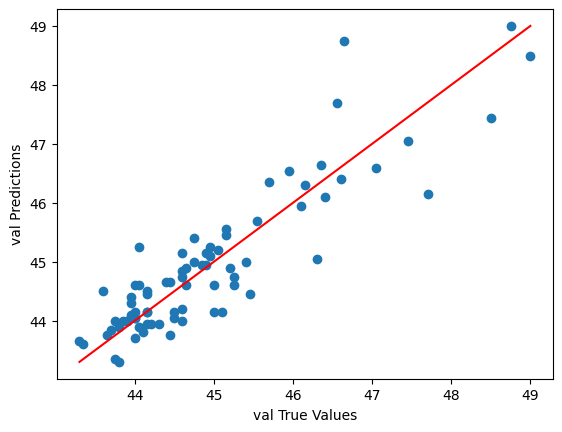

In [ ]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(y_val, y_val_pred)

# 绘制拟合线
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')

# 设置坐标轴标签
plt.xlabel('val True Values')
plt.ylabel('val Predictions')

# 显示图形
plt.show()